In [2]:
from keras.datasets import imdb #  imported imdb  data set from keras dataset
import pandas as pd   # import pandas 
import numpy as np # import numpy

Using TensorFlow backend.


In [3]:
type(imdb) # type of our data set 

module

In [4]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words = 10000) # our dataset is tuple form

In [5]:
print('Shape of train_data ',train_data.shape)
print('Dimention of train_data',train_data.ndim)

Shape of train_data  (25000,)
Dimention of train_data 1


In [6]:
print('Shape of train_data ',train_label.shape)
print('Dimention of train_data',train_label.ndim)

Shape of train_data  (25000,)
Dimention of train_data 1


In [7]:
print('Shape of test data ',test_data.shape)
print('shape of test label',test_data.ndim)


Shape of test data  (25000,)
shape of test label 1


In [8]:
print('Shape of test data ',test_label.shape)
print('shape of test label',test_label.ndim)


Shape of test data  (25000,)
shape of test label 1


In [9]:
def vectorize_sequences(sequences, dimension=10000):        # create a function that will return matrix of ourdate
    results = np.zeros((len(sequences), dimension))   # zero vector created, row: 25000 and columns: 10000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.      # it will assignment 1s where 'i' w.r.t squence(alternative [232,2,443])
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [10]:
print('X train ',x_train.shape)
print('X test',x_test.shape)

X train  (25000, 10000)
X test (25000, 10000)


In [11]:
y_train = np.asarray(train_label).astype('float32')    
y_test = np.asarray(test_label).astype('float32')     

### Architure of Neural Network

In [12]:
from keras import models   
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 16 hidden layers
model.add(layers.Dense(16, activation='relu'))      # again densely conected 16 hidden layers
model.add(layers.Dense(1, activation='sigmoid')) # why 1 because of sigmoid function.

### Compilation of our model


In [13]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### validation: unseen data for both test and training
- x--val start 0 to 10000 columns
- partial x train start 10000 to 25000 columns



In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [15]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 380us/step - loss: 0.5485 - accuracy: 0.7679 - val_loss: 0.4281 - val_accuracy: 0.8657
Epoch 2/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.3368 - accuracy: 0.8995 - val_loss: 0.3262 - val_accuracy: 0.8800
Epoch 3/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.2432 - accuracy: 0.9259 - val_loss: 0.3076 - val_accuracy: 0.8811
Epoch 4/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1869 - accuracy: 0.9407 - val_loss: 0.2984 - val_accuracy: 0.8824
Epoch 5/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1501 - accuracy: 0.9527 - val_loss: 0.2817 - val_accuracy: 0.8891
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1226 - accuracy: 0.9644 - val_loss: 0.2953 - val_accuracy: 0.8856
Epoch 7/20
15000/15000 [==============================] - 3s 

In [17]:
history_dic = history.history

In [18]:
type(history_dic)

dict

In [19]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [20]:
import matplotlib.pyplot as plt

In [21]:
loss_values =  history_dic['loss']
val_loss_values = history_dic['val_loss']

In [22]:
epochs = range(1, len(loss_values) + 1)    # len(loss_values) : total 20 batch we run, it show each of loss in epoch

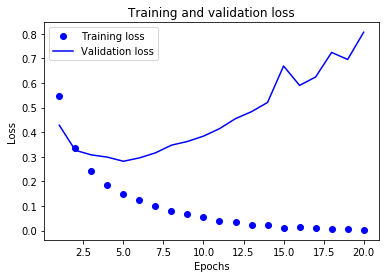

In [23]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

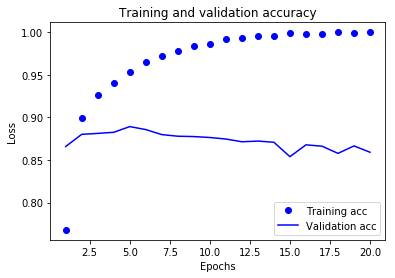

In [24]:
acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
predict = model.predict(x_test)

In [33]:
predict[21]

array([0.9999113], dtype=float32)